In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

def readfile(filename):
    #Get the data from the file
    file = (os.getcwd()+'\\output\\files\\'+str(filename))
    df = pd.read_csv(file, index_col=False)
    
    #Drop unnecessary columns, get exit and entry frame.
    df = df.drop(['Cell kind', 'Coordinates'],axis=1)
    df['exit'] = df.loc[df['Event'] == 'exit', 'Frame'].astype(float)
    df['entry'] = df.loc[df['Event'] == 'entry', 'Frame'].astype(float)
    df = df.drop(['Event', 'Frame'], axis=1)
    
    #Get run number
    df['Run'] = np.nan
    run = 1
    for i, row in df.iterrows():
        if row[0] == 'ID':
            run += 1
        else:
            df.at[i, 'Run'] = run
    
    #Group runs and remove info of cells which haven't finished (last 20)
    df = df[df['ID'] != 'ID']
    dfs = [x for _, x in df.groupby('Run')]
    for i in range(len(dfs)):
        dfs[i] = dfs[i].groupby(['ID'], as_index=False).first()
    df = pd.concat(dfs)
    df = df.dropna(subset=['exit'])
    
    #Remove first 20 cells due to uninhibited movement
    for run in df['Run'].unique():
        ids_to_remove = df[df['Run'] == run]['ID'].unique()[:20]
        df = df[~((df['Run'] == run) & (df['ID'].isin(ids_to_remove)))]
    
    #Casting dtypes
    df['Frames'] = df['exit'].astype(float) - df['entry'].astype(float)
    df['Run'] = df['Run'].astype(int)
    runs = df['Run'].unique()
    
    #Creating final dataframe
    summary_df = pd.DataFrame(columns=['Run', 'Mean Frames', 'Std Frames', 'Min Frames', 'Max Frames'])    
    for run in df['Run'].unique():
        df_run = df[df['Run'] == run]
        mean_frames = df_run['Frames'].mean()
        std_frames = df_run['Frames'].std()
        min_frames = df_run['Frames'].min()
        max_frames = df_run['Frames'].max()
        row = pd.DataFrame({'Run': [run], 'Mean Frames': [mean_frames], 'Std Frames': [std_frames], 'Min Frames': [min_frames], 'Max Frames': [max_frames]})
        summary_df = pd.concat([summary_df, row], ignore_index=True)
    
    #Creating final averaging row
    average_all_runs = summary_df.mean().to_frame().T
    average_all_runs['Run'] = 'Average'
    summary_df = pd.concat([summary_df, average_all_runs], ignore_index=True)
    return summary_df

C:\Users\Rob Pennekamp\Documents\Universiteit\NC\NaturalComputingProject\output\files\lambda_act_100_setting_2.csv


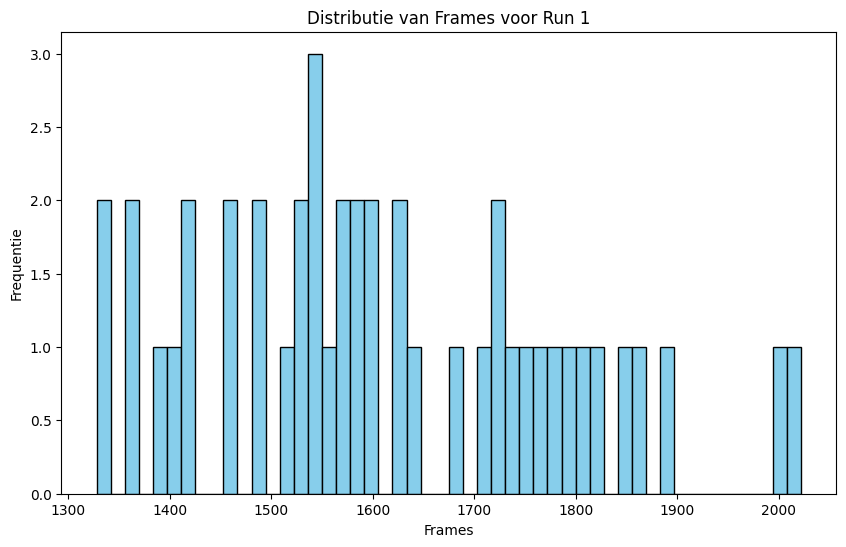

         Run  Mean Frames  Std Frames Min Frames Max Frames
0          1  1612.795455  176.048431     1328.0     2022.0
1          2  1624.382979  164.683696     1282.0     2148.0
2          3  1653.577778  152.723977     1265.0     1990.0
3          4  1626.466667  148.207103     1363.0     1878.0
4          5  1635.181818  185.988156     1198.0     2106.0
..       ...          ...         ...        ...        ...
96        97  1644.044444  157.016785     1362.0     2059.0
97        98  1627.844444  150.737875     1318.0     1954.0
98        99  1652.177778  152.740613     1314.0     2054.0
99       100  1685.954545  147.890744     1309.0     2049.0
100  Average  1635.498757  157.495495    1316.63     1990.0

[101 rows x 5 columns]


In [5]:
print(make_df('lambda_act_100_setting_2.csv'))

C:\Users\Rob Pennekamp\AppData\Local\Temp\ipykernel_26912\1730410220.py:6: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv("Simulation_6-9_14-6-4.csv", index_col=False)


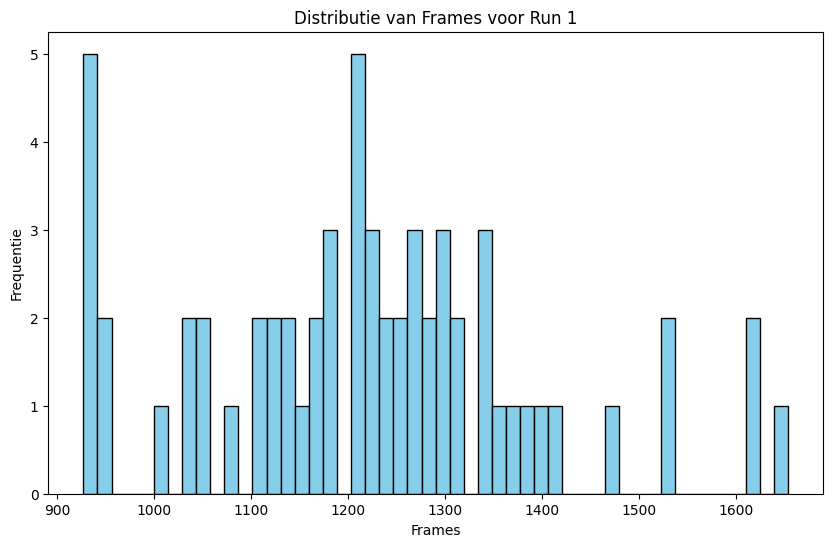

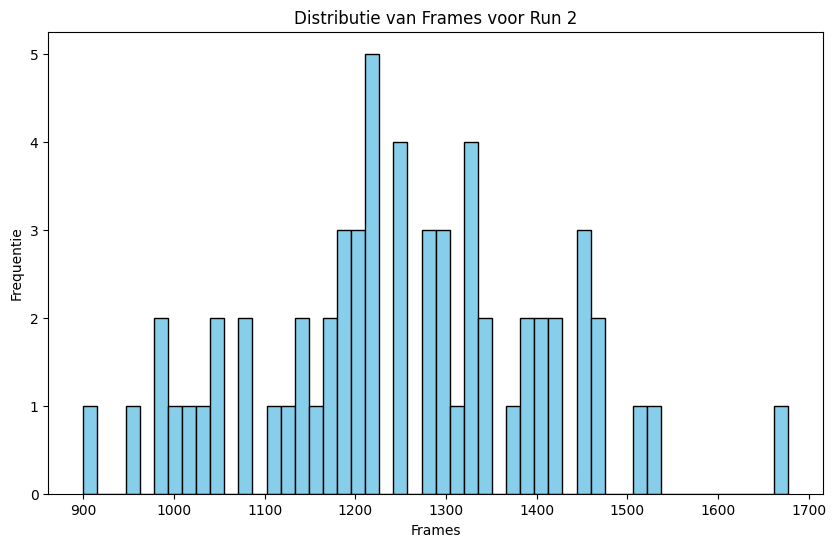

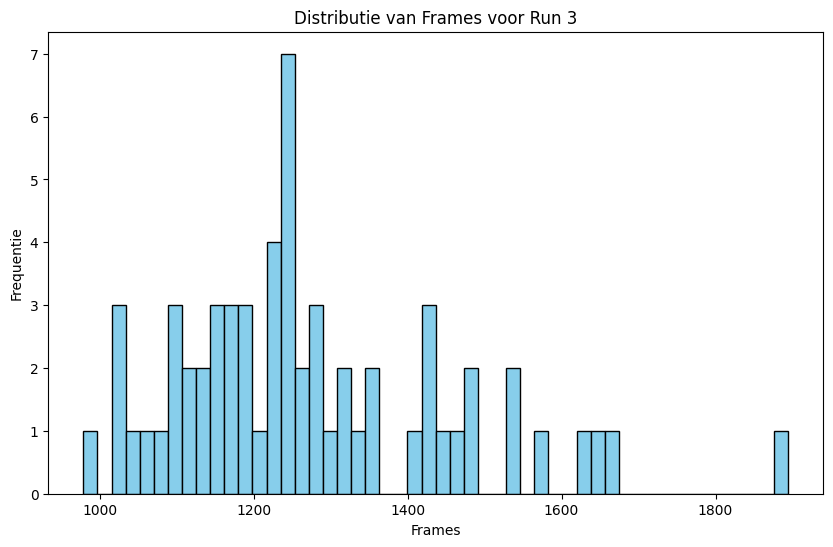

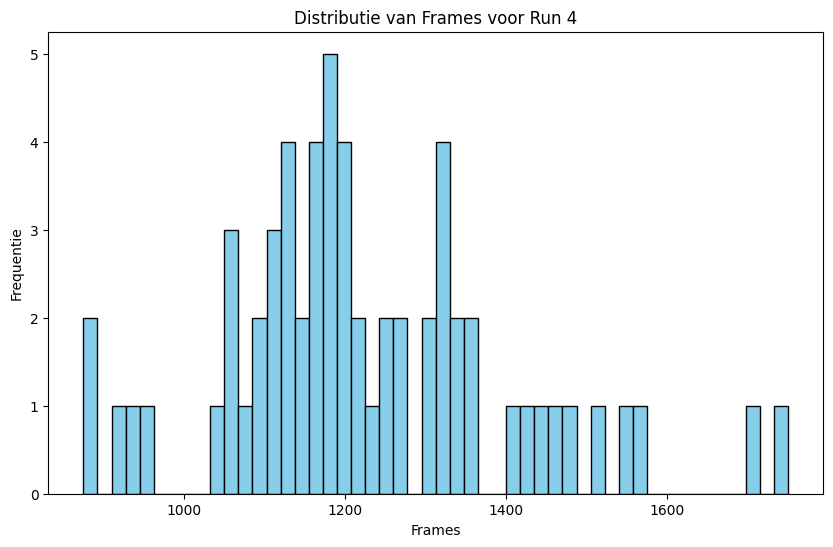

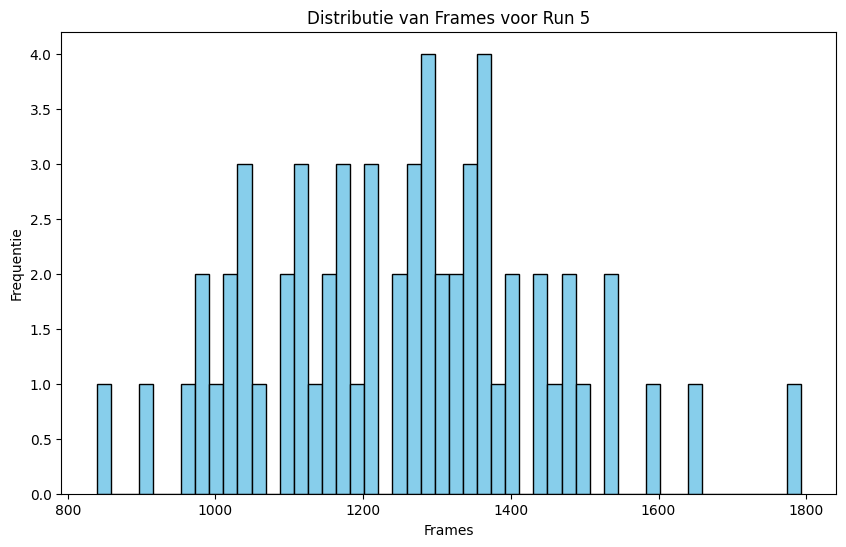

AttributeError: 'DataFrame' object has no attribute 'append'

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lees het CSV-bestand in
df = pd.read_csv("Simulation_6-9_14-6-4.csv", index_col=False)

# Verwijder de genoemde kolommen
df = df.drop(['Cell kind', 'Coordinates'], axis=1)

# Maak nieuwe kolommen op basis van de 'Event' kolom
df['exit'] = df.loc[df['Event'] == 'exit', 'Frame'].astype(float)
df['entry'] = df.loc[df['Event'] == 'entry', 'Frame'].astype(float)

# Verwijder de 'Event' en 'Frame' kolommen
df = df.drop(['Event', 'Frame'], axis=1)

# Voeg een 'Run' kolom toe
df['Run'] = np.nan

# Ga door de rijen en verhoog het runnummer elke keer als je de kolomnamen tegenkomt
run = 1
for i, row in df.iterrows():
    if row[0] == 'ID':  # als de eerste waarde van de rij 'ID' is, dan is dit de start van een nieuwe run
        run += 1
    else:
        df.at[i, 'Run'] = run

# Verwijder de rijen met de kolomnamen
df = df[df['ID'] != 'ID']

# Splits het DataFrame in afzonderlijke DataFrames per unieke Run
dfs = [x for _, x in df.groupby('Run')]

# Voor elke DataFrame, groepeer de rijen op basis van de ID en combineer de waarden van 'exit' en 'entry'
for i in range(len(dfs)):
    dfs[i] = dfs[i].groupby(['ID'], as_index=False).first()

# Combineer de DataFrames weer
df = pd.concat(dfs)

# Verwijder de rijen die geen 'exit' waarde hebben
df = df.dropna(subset=['exit'])

# Voor elke unieke Run, verwijder de rijen met de eerste 20 unieke ID's
for run in df['Run'].unique():
    ids_to_remove = df[df['Run'] == run]['ID'].unique()[:20]
    df = df[~((df['Run'] == run) & (df['ID'].isin(ids_to_remove)))]

# Berekent het verschil tussen 'exit' en 'entry' kolommen
df['Frames'] = df['exit'].astype(float) - df['entry'].astype(float)

# Datatype van 'Run' kolom naar integer veranderen
df['Run'] = df['Run'].astype(int)

# Unieke runs identificeren
runs = df['Run'].unique()

# Plot maken voor elke unieke run
for run in runs[:5]:  # Wijzigen om meer of minder runs te visualiseren
    df_run = df[df['Run'] == run]
    plt.figure(figsize=(10,6))
    plt.hist(df_run['Frames'], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Distributie van Frames voor Run {run}')
    plt.xlabel('Frames')
    plt.ylabel('Frequentie')
    plt.show()

summary_df = pd.DataFrame(columns=['Run', 'Mean Frames', 'Std Frames', 'Min Frames', 'Max Frames'])

# Voor elke unieke run, bereken en sla de gemiddelde, standaarddeviatie, minimum en maximum van de 'Frames' op
for run in df['Run'].unique():
    df_run = df[df['Run'] == run]
    mean_frames = df_run['Frames'].mean()
    std_frames = df_run['Frames'].std()
    min_frames = df_run['Frames'].min()
    max_frames = df_run['Frames'].max()
    summary_df = summary_df.append({'Run': run, 'Mean Frames': mean_frames, 'Std Frames': std_frames, 'Min Frames': min_frames, 'Max Frames': max_frames}, ignore_index=True)

# Bereken het gemiddelde van de kolommen over alle runs
average_all_runs = summary_df.mean()
average_all_runs['Run'] = 'Average'

# Voeg de gemiddelde waarden toe aan het einde van de DataFrame
summary_df = summary_df.append(average_all_runs, ignore_index=True)

# Afdrukken van het overzicht
print(summary_df)

# Opslaan van het df DataFrame als een CSV-bestand
df.to_csv('verwerkte_data.csv', index=False)

# Opslaan van het summary_df DataFrame als een CSV-bestand
summary_df.to_csv('samenvatting_data.csv', index=False)

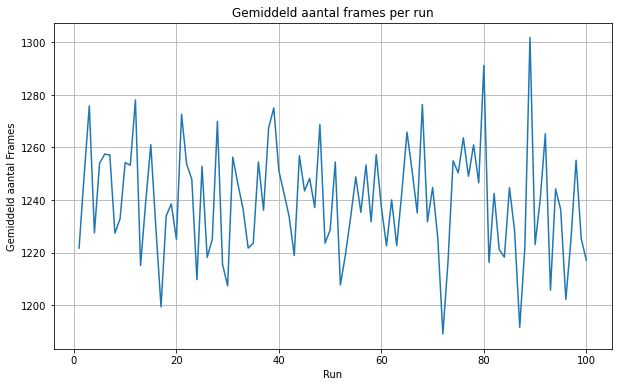

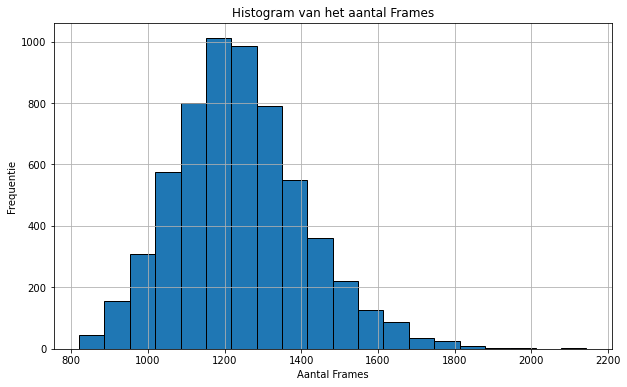

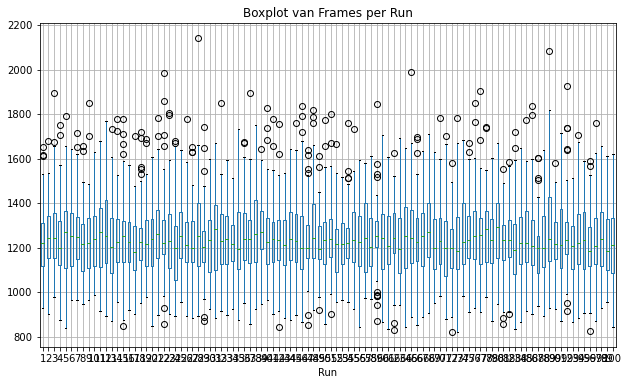

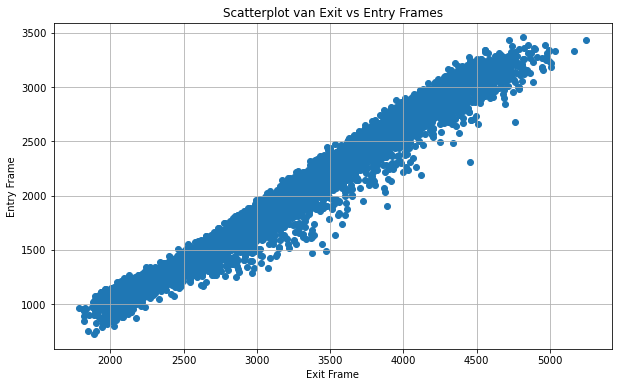

In [10]:
import matplotlib.pyplot as plt

# Maak een plot voor het gemiddeld aantal frames per run
plt.figure(figsize=(10,6))
plt.plot(summary_df['Run'][:-1], summary_df['Mean Frames'][:-1])  # we sluiten het laatste gemiddelde uit
plt.xlabel('Run')
plt.ylabel('Gemiddeld aantal Frames')
plt.title('Gemiddeld aantal frames per run')
plt.grid(True)
plt.show()

# Maak een histogram van de gemiddelde frames
plt.figure(figsize=(10,6))
plt.hist(df['Frames'], bins=20, edgecolor='black')
plt.xlabel('Aantal Frames')
plt.ylabel('Frequentie')
plt.title('Histogram van het aantal Frames')
plt.grid(True)
plt.show()

# Boxplot van Frames per Run
df.boxplot(column='Frames', by='Run', figsize=(10,6))
plt.title('Boxplot van Frames per Run')
plt.suptitle('')  # Verwijder de automatische 'Boxplot grouped by Run' titel
plt.show()

# Scatterplot van 'exit' en 'entry'
plt.figure(figsize=(10,6))
plt.scatter(df['exit'], df['entry'])
plt.xlabel('Exit Frame')
plt.ylabel('Entry Frame')
plt.title('Scatterplot van Exit vs Entry Frames')
plt.grid(True)
plt.show()
